# Task 3

Suponga que usted es gerente de proyecto en Inversiones Chileras S.A.; y debe elegir entre dos proyectos a realizar, la construcción de un Hotel o la construcción de de un Centro Comercial. Los flujos de caja esperados para cada proyecto son los siguientes:
<br>
<br>
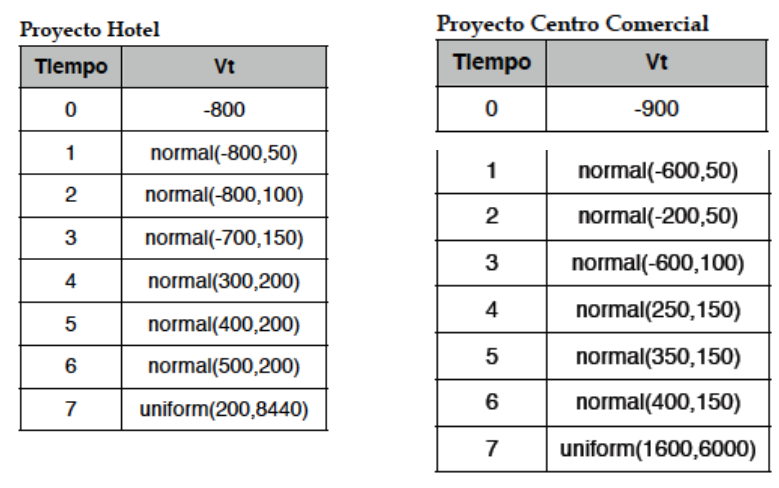

Si el parámetro que quiere utilizar para comprar ambos proyectos es el Valor Presente Neto al 10% del costo de capital.

1. Realice tres simulaciones para determinar cuál de los proyectos es el más rentable. Utilice 100, 1,000 y 10,000 iteraciones

## Librerias

In [1]:
import numpy as np
import pandas as pd

## Modelado de Flujos de caja

In [2]:
def flujo_hotel():
    """
    Genera un flujo de datos para un hotel con 8 habitaciones.

    El flujo de datos es un DataFrame con 8 columnas, una por habitación.
    Cada columna contiene el número de personas en la habitación en un momento dado.
    """
    return [
        -800,
        np.random.normal(-800, 50),
        np.random.normal(-800, 100),
        np.random.normal(-700, 150),
        np.random.normal(300, 200),
        np.random.normal(400, 200),
        np.random.normal(500, 200),
        np.random.uniform(200, 8440)
    ]

In [3]:
def flujo_centro_comercial():
    """
    Retorna un flujo de caja para un centro comercial.

    El flujo de caja es una lista de 8 elementos, donde cada elemento
    representa el flujo de caja de un mes. El primer elemento es el flujo
    de caja del mes actual, y los siguientes elementos son el flujo de caja
    """
    return [
        -900,
        np.random.normal(-600, 50),
        np.random.normal(-200, 50),
        np.random.normal(-600, 100),
        np.random.normal(250, 150),
        np.random.normal(350, 150),
        np.random.normal(400, 150),
        np.random.uniform(1600, 6000)
    ]

In [4]:
# Función para calcular el VPN
def calcular_vpn(flujos, tasa_descuento=0.1):
    """
    Calcula el valor presente neto de una serie de flujos de caja.

    Args:
        flujos (list): Lista de flujos de caja.
        tasa_descuento (float): Tasa de descuento a utilizar.

    Returns:
        float: Valor presente neto de los flujos de caja.
    """
    return sum(f / (1 + tasa_descuento) ** t for t, f in enumerate(flujos))

In [5]:
# Simulación de Monte Carlo
def simulacion_montecarlo(n_iteraciones, flujo_proyecto):
    """
    Realiza una simulación de Monte Carlo para un proyecto.

    Args:
        n_iteraciones (int): Número de iteraciones a realizar.
        flujo_proyecto (callable): Función que genera un flujo de caja.

    Returns:
        tuple: Media y desviación estándar del valor presente neto.
    """
    # Lista para almacenar los resultados de la simulación
    vpn_resultados = []

    # Realizar n_iteraciones de la simulación
    for _ in range(n_iteraciones):
        # Generar un flujo de caja para el proyecto
        flujos = flujo_proyecto()
        vpn = calcular_vpn(flujos)
        vpn_resultados.append(vpn)

    # Calcular la media y desviación estándar de los resultados
    return np.mean(vpn_resultados), np.std(vpn_resultados)

## Simulación

In [6]:
# Parámetros de la simulación
n_iteraciones_list = [100, 1000, 10000]

# Resultados para cada proyecto
resultados = {}

# Realizar la simulación para cada número de iteraciones
for n_iter in n_iteraciones_list:
    # Realizar la simulación para el hotel y el centro comercial
    media_hotel, std_hotel = simulacion_montecarlo(n_iter, flujo_hotel)
    media_cc, std_cc = simulacion_montecarlo(n_iter, flujo_centro_comercial)
    
    # Almacenar los resultados en el diccionario
    resultados[n_iter] = {
        "Hotel": {"Media": media_hotel, "STD": std_hotel},
        "Centro Comercial": {"Media": media_cc, "STD": std_cc}
    }

# Descomponemos el diccionario en un DataFrame más limpio
data = {
    "Iteraciones": [],
    "Proyecto": [],
    "Media": [],
    "STD": []
}

# Llenar el DataFrame con los resultados
for n_iter, result in resultados.items():
    # Iterar sobre los proyectos y sus valores
    for proyecto, valores in result.items():
        # Agregar los valores al DataFrame
        data["Iteraciones"].append(n_iter)
        data["Proyecto"].append(proyecto)
        data["Media"].append(valores["Media"])
        data["STD"].append(valores["STD"])

# Crear el DataFrame
df_limpio = pd.DataFrame(data)

# Mostrar el DataFrame
display(df_limpio)

,Iteraciones,Proyecto,Media,STD
0,100,Hotel,291.190864,1208.428521
1,100,Centro Comercial,595.534280,646.239531
2,1000,Hotel,147.501905,1245.497053
3,1000,Centro Comercial,480.995994,677.918810
4,10000,Hotel,229.752251,1242.824269
5,10000,Centro Comercial,497.514513,673.834056
